Train samples: 25000
Test samples: 25000
Train data shape: (25000, 200)
Test data shape: (25000, 200)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 128)          1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 196, 128)          82048     
                                                                 
 global_max_pooling1d_1 (Gl  (None, 128)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)  

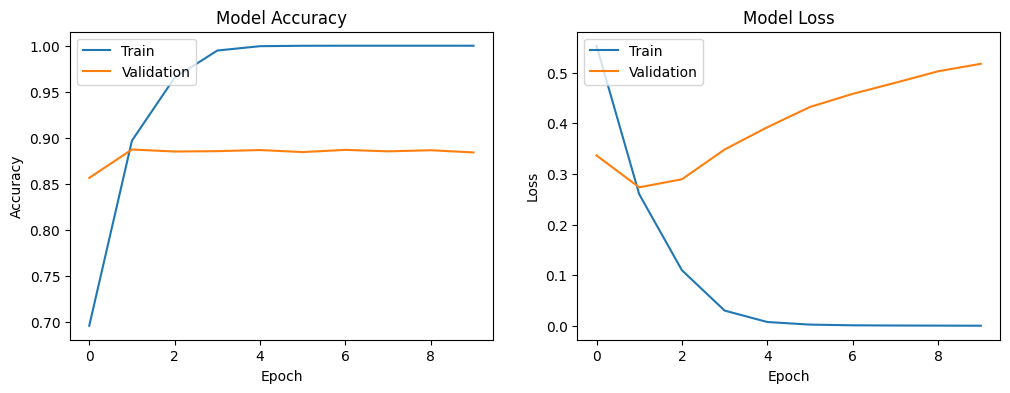

1/1 [==============================] - 0s 140ms/step
Sentiment: Positive
Confidence: 0.9989


In [2]:
# Step 1: Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Load and preprocess data
# Load IMDB dataset
imdb = tf.keras.datasets.imdb
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

# Inspect the dataset
print(f'Train samples: {len(x_train)}')
print(f'Test samples: {len(x_test)}')

# Pad sequences to ensure equal length
maxlen = 200  # Panjang maksimal dari setiap review
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

print(f'Train data shape: {x_train.shape}')
print(f'Test data shape: {x_test.shape}')

# Step 3: Build CNN model
# Parameters
embedding_dim = 128
num_filters = 128
kernel_size = 5
hidden_dims = 128

# Build model
model = Sequential([
    Embedding(input_dim=10000, output_dim=embedding_dim, input_length=maxlen),
    Conv1D(filters=num_filters, kernel_size=kernel_size, padding='valid', activation='relu'),
    GlobalMaxPooling1D(),
    Dense(hidden_dims, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Step 4: Train the model
batch_size = 128
epochs = 10

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2, verbose=1)

# Step 5: Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Step 6: Classify new text
# Function to preprocess and classify new text
def classify_text(text):
    # Tokenize and pad the text
    tokenizer = tf.keras.datasets.imdb.get_word_index()
    words = text.lower().split()

    # Convert words to integers using the IMDb tokenizer
    sequence = [tokenizer.get(word, 0) for word in words]

    # Pad the sequence
    padded_sequence = pad_sequences([sequence], maxlen=maxlen)

    # Predict the sentiment
    prediction = model.predict(padded_sequence)

    # Interpret the prediction
    sentiment = "Positive" if prediction[0][0] > 0.5 else "Negative"
    confidence = prediction[0][0] if sentiment == "Positive" else 1 - prediction[0][0]

    return sentiment, confidence

# Example usage
new_text = "I really enjoyed this movie. It was fantastic and had great acting!"
sentiment, confidence = classify_text(new_text)

print(f"Sentiment: {sentiment}")
print(f"Confidence: {confidence:.4f}")
